# MBA FIAP Inteligência Artificial & Machine Learning

![Image of Dementia](img/ml.png)

## Programando IA com Python
## Projeto Final: Estimando Preços de Automóveis Utilizando Modelos de Regressão

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir um classificador que permitirá predizer o valor de um automóvel baseado em algumas características que cada grupo deverá escolher.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes        | RM            | Turma |
| :-----------------------    | :------------- | :-----: |
| Alexei Dimitri Diniz Campos | RM 331056      | `2IA` |


Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Exploração de Dados__
2. __Preparação de Dados__
3. __Desenvolvimento do Modelo__
4. __Treinamento e Teste do Modelo__
5. __Validação e Otimização do Modelo__
6. __Conclusões Finais__

## Exploração de Dados

Os dados que serão utilizados foram modificados para propocionar uma experiência que explore melhor as técnicas de processamento e preparação de dados aprendidas.

Originalmente os dados foram extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

**Implementação** 

Carregue o dataset "automobile-mod.csv" que se encontra na pasta "data" e faça uma inspeção nas 10 primeiras linhas para identificação básica dos atributos.

**O dataset original "automobile.csv" se encontra na mesma pasta apenas como referência. Não deverá ser utilizado.**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path

%matplotlib inline
plt.style.use('seaborn')

%config IPCompleter.greedy=True

In [2]:
#IMPLEMENTAR
datasetbase = Path("data/")
automobile = pd.read_csv(datasetbase / "automobile-mod.csv", sep= ';')
#Vamos ver extatamente quais são as colunas...
print(automobile.columns.tolist())
#Só para termos uma noção, vamos ver quais são as dimensões desse Dataframe:
print()
print("Tamanho:")
print(automobile.shape)
#E vamos enfim extrair as 10 primeiras linhas do dataset...
automobile.head(10)


['make', 'fuel_type', 'aspiration', 'number_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'number_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

Tamanho:
(201, 24)


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


Relação das colunas e seu significado:

1. make: fabricante;
2. fuel_type: tipo de combustível;
3. aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std);
4. number_of_doors: quantidade de portas; 
4. body_style: estilo do carro, ex. sedan ou hatchback;
5. drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira);
6. engine_location: se o motor se localiza atrás ou na frente;
6. wheel_base: entre-eixos, distância entre o eixo dianteiro e o eixo traseiro;
7. length: comprimento;
8. width: largura;
9. height: altura;
10. curb_weight: peso;
11. engine_type: tipo do motor;
12. number_of_cylinders: cilindrada, quantidade de cilindros;
13. engine_size: tamanho do motor;
14. fuel_system: sistema de injeção;
15. bore: diâmetro do cilindro;
16. stroke: diâmetro do pistão;
17. compression_ratio: razão de compressão;
18. horsepower: cavalo de força ou HP;
19. peak_rpm: pico de RPM (rotações por minuto);
20. city_mpg: consumo em mpg (milhas por galão) na cidade;
21. highway_mpg: consumo em mpg (milhas por galão) na estrada; e
22. price: preço (**Variável Alvo**).

### Correlacionamento dos atributos

Vamos utilizar algumas suposições e validar se elas são verdadeiras, por exemplo, o preço do carro pode variar com seu consumo, tamanho ou força? Vamos explorar estas hipósteses ou outras que o grupo julgue relevante.

**Resposta**: Vamos avaliar preeliminarmente como as variáveis numéricas se correlacionam com o preço (sem fazer limpeza nos dados). Consideraremos em um primeiro momento, variáveis com pelo menos 20% de correlação:

In [3]:
def correlacao_20(correlacao, target, threshold):
    return correlacao[target][(correlacao[target] <= (-threshold)) | (correlacao[target] >= threshold)]

In [4]:
#IMPLEMENTAR
corr_20 = automobile.corr()
print(correlacao_20(corr_20, "price", 0.2))

wheel_base     0.584642
length         0.690628
width          0.751265
curb_weight    0.834415
engine_size    0.872335
bore           0.543052
horsepower     0.810795
city_mpg      -0.657661
highway_mpg   -0.712812
price          1.000000
Name: price, dtype: float64


As colunas que nos interessam nesse momento são city_mpg, highway_mpg (consumo) length, width, height (dimensões) e horsepower (força do motor).
1. Existe uma correlação significativa com a largura (width) de 0.75. Veja que uma correlação mais significativa ainda entre o preço e o peso (curb_weight) de 0.83 e com dimensões (engine_size) de 0.87 do motor são mais significativas, porém próximas. Em outras palavras, dizer que um carro mais largo é quase a mesma coisa de dizer que ele é mais pesado, o que por aproximação implica que ele pode ser mais caro;
2. Existe uma correção significativa de -0.65 a -0.71 (na cidade e nas rodovias, respectivamente) entre consumo e preço. O sinal negativo nesse caso significa que quanto mais econômico o veículo, mais caro ele é;
3. A força do motor é quase tão significativa quanto o peso e as dimensões do motor, estando as 3 variáveis correlacionadas por um fator maior do que 0.8 com o preço.

Arrisco a dizer que com o peso, o tamanho e a força do motor podemos determinar com pelo menos 75% de certeza qual o preço do veículo.

In [5]:
numericos = automobile.select_dtypes(include=[np.number])

In [6]:
def plota_price(coluna):
    sns.lmplot("price", coluna, automobile,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

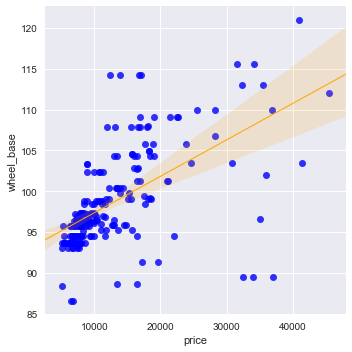

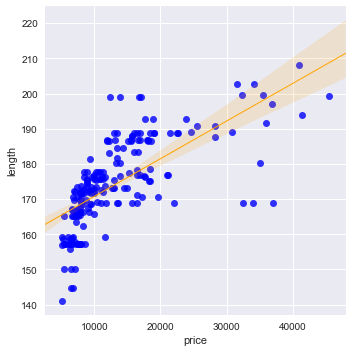

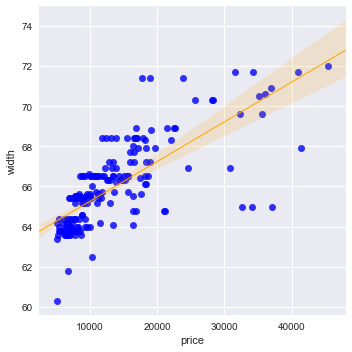

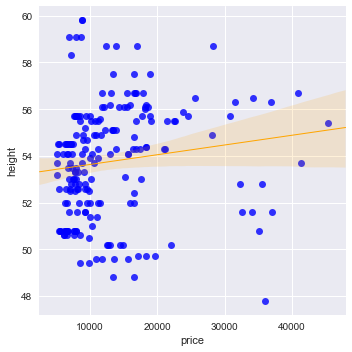

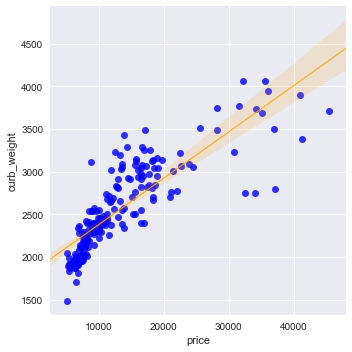

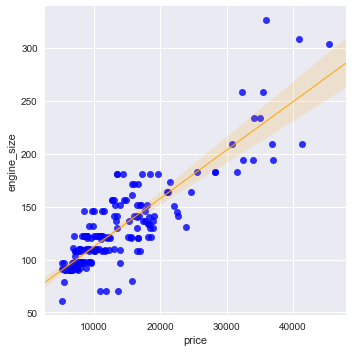

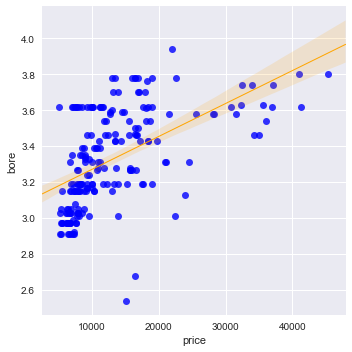

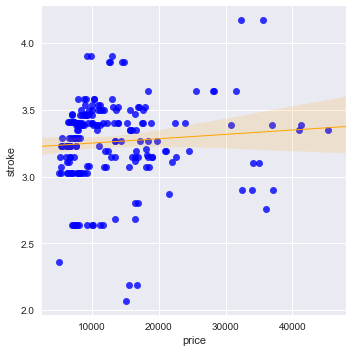

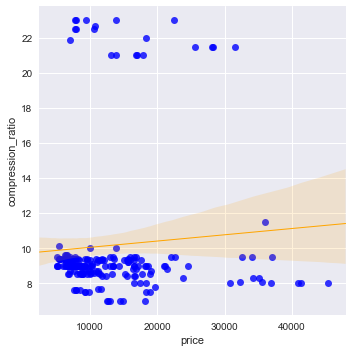

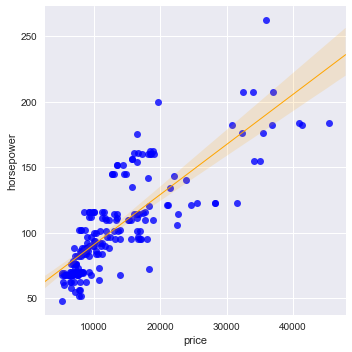

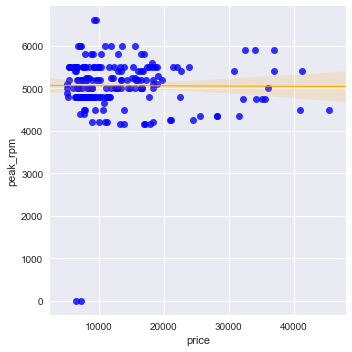

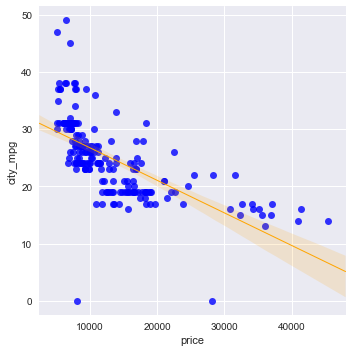

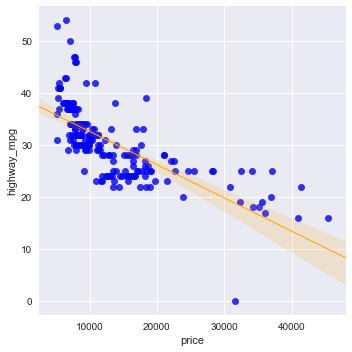

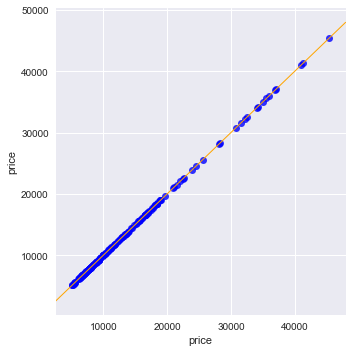

In [7]:
for coluna in numericos.columns.tolist():
    plota_price(coluna)

**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:**

## Preparação dos Dados

### Identificação de Outliers Visualmente

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma análise exploratória.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

In [8]:
def norm(dataset):
    for coluna in dataset.columns.values:
        dataset[coluna] = dataset[coluna].div(dataset[coluna].sum(), axis= 0)

def boxplot(dataset):
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 18)
    sns.boxplot(ax= ax, data= dataset)
    
def norm_e_boxplot(colunas):
    numericos_norm = numericos.copy()[colunas]
    norm(numericos_norm)
    boxplot(numericos_norm)

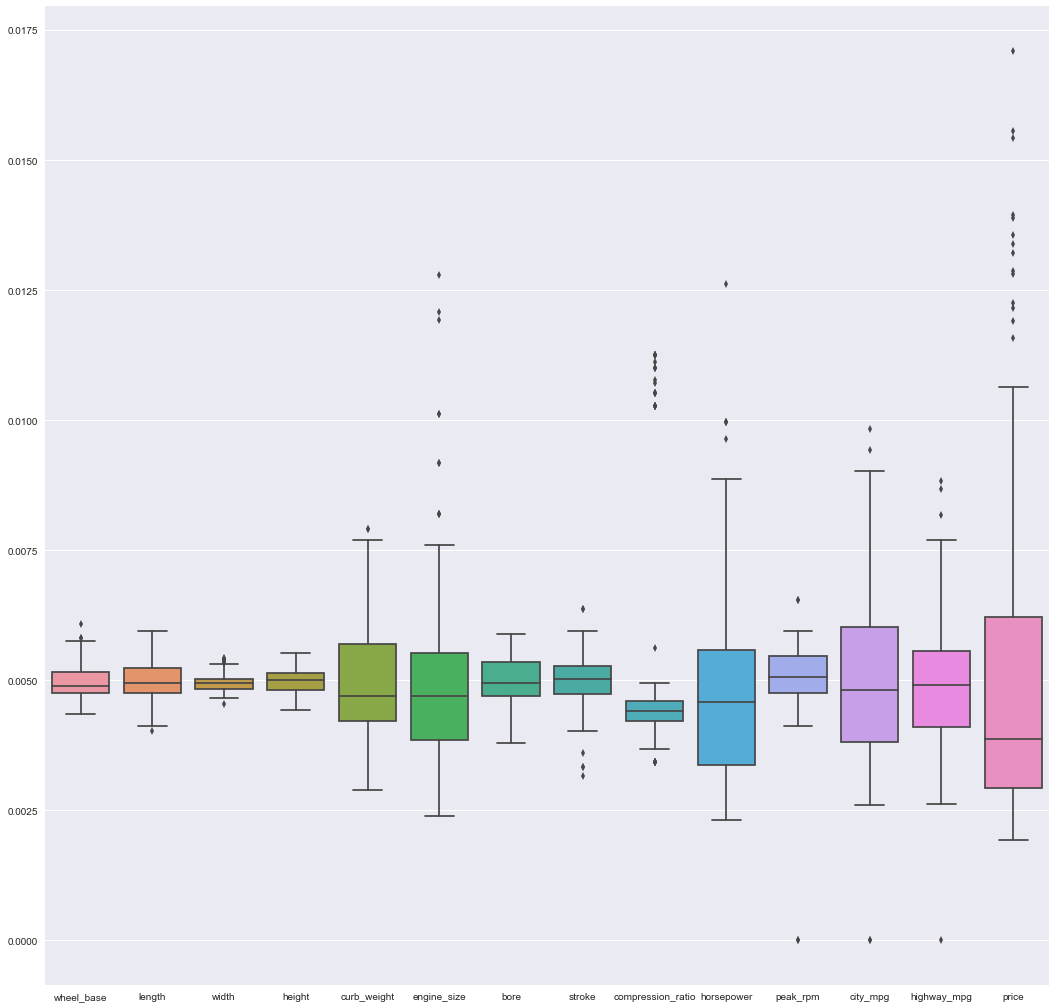

In [9]:
#IMPLEMENTAÇÃO
norm_e_boxplot(numericos.columns.values)

wheel_base, length, width, height, bore e stroke= ficariam melhores em um mesmo diagrama. Vamos normalizar essas colunas em um diagrama separado:

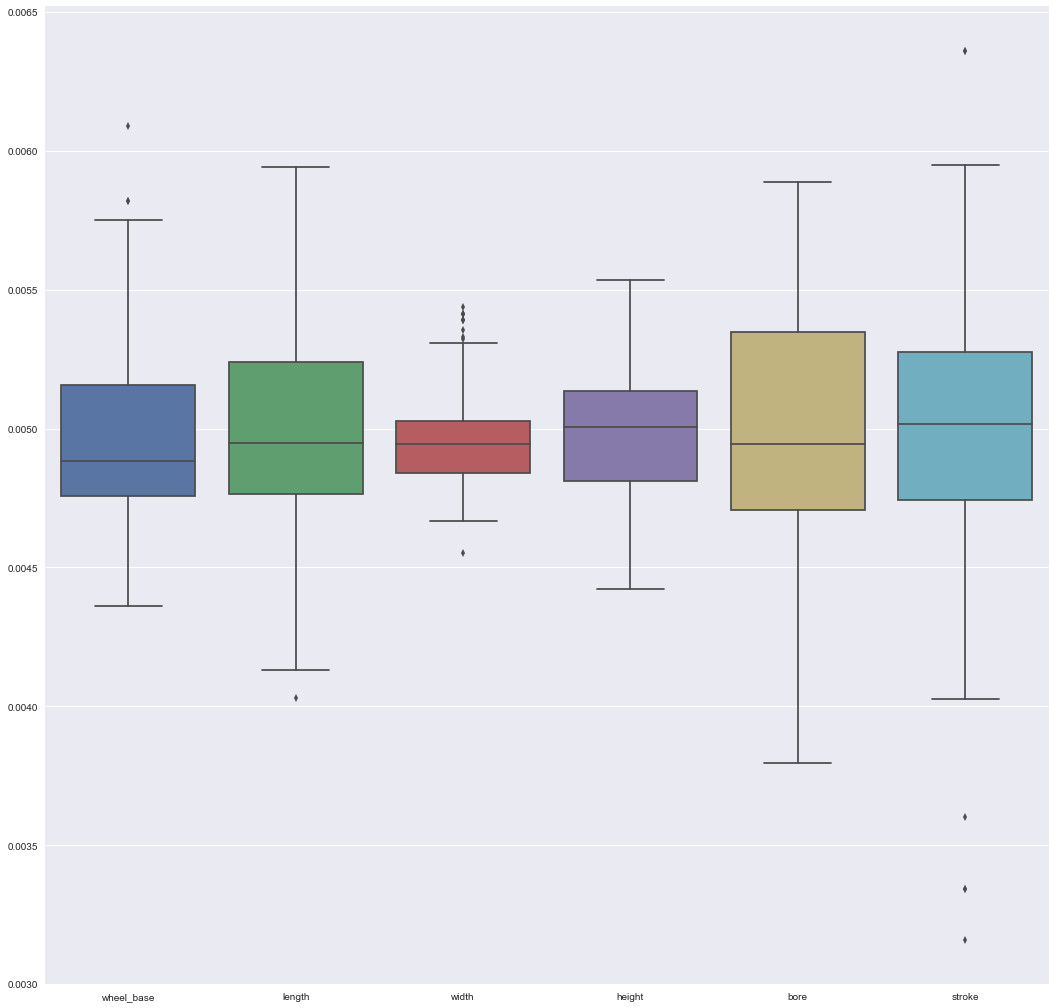

In [10]:
norm_e_boxplot(["wheel_base", "length", "width", "height", "bore", "stroke"])

compression_ratio ficou estranho em ambos diagramas. Vamos plotá-lo aqui:

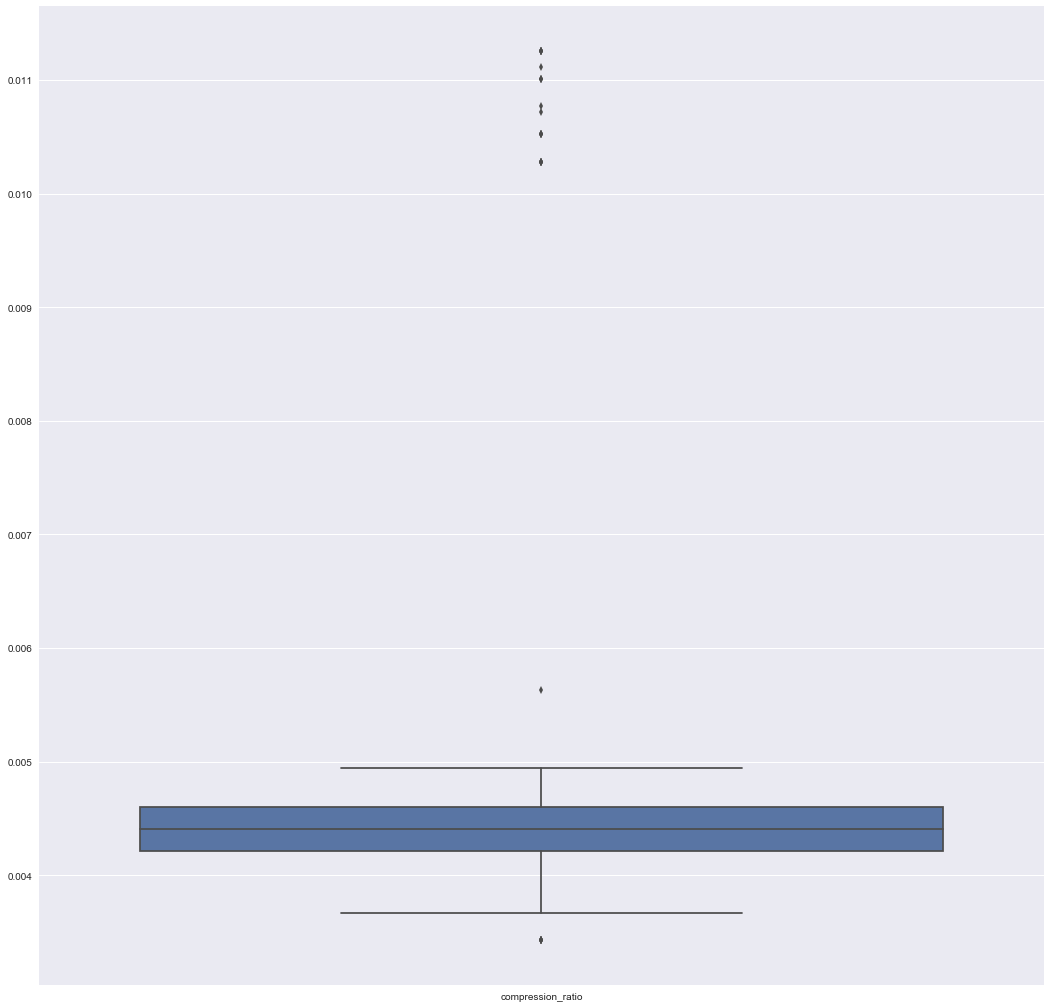

In [11]:
norm_e_boxplot(["compression_ratio"])

Antes de explorar melhor as correlações, vamos analisar se há dados discrepante no conjunto de dados. Analisar os dados sem esta análise antes pode nos levar a algum viés indesejado.

### Análise de valores inválidos

Analise e busque por valores considerados nulos.

In [12]:
#IMPLEMENTAÇÃO
print(numericos.isna().any())
numericos[numericos.isna().any(axis= 1)]

wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_size          False
bore                 False
stroke               False
compression_ratio    False
horsepower           False
peak_rpm              True
city_mpg              True
highway_mpg           True
price                False
dtype: bool


,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,93.7,150.0,64.0,52.6,1940,92,2.91,3.41,9.2,76,0.0,30.0,NaN,6529
36,96.5,167.5,65.2,53.3,2236,110,3.15,3.58,9.0,86,5800.0,NaN,33.0,7895
136,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,73,NaN,26.0,31.0,7603
184,97.3,171.7,65.5,55.7,2300,109,3.19,3.40,10.0,100,NaN,26.0,32.0,9995


In [13]:
#encontrando valores paramétricos únicos
parametricos=automobile.select_dtypes(exclude=[np.number])
for coluna in parametricos.columns.tolist():
    print("Coluna: %s, valores: %s" % (coluna, sorted(parametricos[coluna].unique())))


Coluna: make, valores: ['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']
Coluna: fuel_type, valores: ['diesel', 'gas']
Coluna: aspiration, valores: ['std', 'turbo']
Coluna: number_of_doors, valores: ['four', 'two']
Coluna: body_style, valores: ['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']
Coluna: drive_wheels, valores: ['4wd', 'fwd', 'rwd']
Coluna: engine_location, valores: ['front', 'rear']
Coluna: engine_type, valores: ['dohc', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor']
Coluna: number_of_cylinders, valores: ['eight', 'five', 'four', 'six', 'three', 'twelve', 'two']
Coluna: fuel_system, valores: ['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi']


Para os dados considerados nulos, realize a imputação de dados utilizando um valor apropriado (note que pode haver dados paramétricos e dados numéricos). Justique sua resposta.

__Resposta__: Após certa pesquisa, não encontrei uma fórmula que correlacione as colunas numéricas. É melhor remover valores inválidos (0 por exemplo) e NaN do dataset, pois podemos introduzir um viés indesejado nos cálculos, ao colocar um suposto valor nas colunas nulas, além de ser o método mais simples. No caso, temos apenas 4 linhas nulas, em um dataset com 200 entradas. 

Com relação aos valores paramétricos, não encontrei nenhum valor que pareça ser inválido.

In [14]:
#IMPLEMENTAÇÃO
automobile = automobile.dropna()
numericos = numericos.dropna()

### Análise de valores com valores iguais a 0

Analise se no conjunto de dados há valores iguais a 0 e verifique se faz parte do contexto. Caso não faça parte do contexto, utilize alguma técnica de imputação de dados apropriada.

Inspecione o dataset por dados iguais a 0.

In [15]:
#IMPLEMENTAÇÃO
print((numericos==0).any())
numericos[(numericos==0).any(axis= 1)]

wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_size          False
bore                 False
stroke               False
compression_ratio    False
horsepower           False
peak_rpm              True
city_mpg              True
highway_mpg           True
price                False
dtype: bool


,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
35,96.5,157.1,63.9,58.3,2024,92,2.92,3.41,9.2,76,0.0,30.0,34.0,7295
66,106.7,187.5,70.3,54.9,3495,183,3.58,3.64,21.5,123,4350.0,0.0,25.0,28176
67,115.6,202.6,71.7,56.3,3770,183,3.58,3.64,21.5,123,4350.0,22.0,0.0,31600
181,97.3,171.7,65.5,55.7,2212,109,3.19,3.40,9.0,85,5250.0,0.0,34.0,8195


Dessa forma constatamos que as colunas com zero são peak_rpm, city_mpg, e highway_mpg.

A imputação de dados pode seguir algum padrão dos demais exemplos ou pode ser simplesmente atribuído um valor. Avalie tais condições de acordo com as inspeções de dados.

Novamente notamos que as colunas com valor 0 são as mesmas que tinham valores NaN. Vou proceder com a mesma estratégia de antes, e apagar as entradas com 0.

In [16]:
#IMPLEMENTAÇÃO
index_zeros = [35, 66, 67, 181]
automobile = automobile.drop(index=index_zeros)
numericos = numericos.drop(index=index_zeros)
automobile.shape


(193, 24)

### Análise Numérica de Outliers

Da análise visual de outliers realizada acima vamos utilizar uma métrica de verificação mais apropriada e objetiva afim de criar um patamar aceitável de dados não discrepantes.

Neste projeto vamos considerar [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), que utiliza um __passo de limite__ que é 5 vezes (em nosso projeto) a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Deste modo, valores que sejam maiores que o Q3 + passo de limite ou menor Q1 - passo de limite sejam sinalizados como outliers.

Construa uma função que receba como parâmetro de entrada um série de dados e exiba os valores discrepantes. Utilize o boilerplate abaixo para completar as instruções faltantes.

*Dica: utilize a função do Numpy de percentil, np.percentile(serie, 25) para quartil 1 e np.percentile(serie, 75) para quartil 3.*

In [17]:
def identificacao_outlier(df, column_name): 
    print(column_name)
    
    #IMPLEMENTAÇÃO
    quartil_1 = np.percentile(df[column_name], 25)
    mediana = np.median(df[column_name])
    quartil_3 = np.percentile(df[column_name], 75)
    passo = 5 * (quartil_3 - quartil_1)
    limite_inferior = quartil_1 - passo
    limite_superior = quartil_3 + passo

    outliers = df[column_name][((limite_inferior > df[column_name]) | (df[column_name] > limite_superior))].tolist()
     
    print("Limite Inferior: %d; mediana: %d; limite superior: %d" % (limite_inferior, mediana, limite_superior))
    print("Outliers: %s" % outliers)
    print()

In [18]:
for column in numericos.columns.tolist():
    identificacao_outlier(numericos, column)

wheel_base
Limite Inferior: 54; mediana: 97; limite superior: 141
Outliers: []

length
Limite Inferior: 83; mediana: 173; limite superior: 266
Outliers: []

width
Limite Inferior: 52; mediana: 65; limite superior: 78
Outliers: []

height
Limite Inferior: 34; mediana: 54; limite superior: 73
Outliers: []

curb_weight
Limite Inferior: -1616; mediana: 2425; limite superior: 6711
Outliers: []

engine_size
Limite Inferior: -117; mediana: 120; limite superior: 356
Outliers: []

bore
Limite Inferior: 0; mediana: 3; limite superior: 5
Outliers: []

stroke
Limite Inferior: 1; mediana: 3; limite superior: 4
Outliers: []

compression_ratio
Limite Inferior: 3; mediana: 9; limite superior: 13
Outliers: [22.7, 22.0, 21.5, 21.5, 21.9, 21.0, 21.0, 21.0, 21.0, 21.0, 22.5, 22.5, 22.5, 23.0, 23.0, 23.0, 23.0, 23.0]

horsepower
Limite Inferior: -160; mediana: 95; limite superior: 346
Outliers: []

peak_rpm
Limite Inferior: 1300; mediana: 5200; limite superior: 9000
Outliers: []

city_mpg
Limite Inferior: 

**Pergunta:** Houve dados discrepantes localizados pela metodologia sugerida? Quais foram os atributos discretpantes e quais as hipótese de serem discrepantes? Qual foi a sua conclusão, são realmente dados que devem ser removidos ou mantidos? Justifique.

**Resposta:** A taxa de compressão foi o único atributo que mostrou valores discrepantes usando o critério apresentado. Observando os valores discrepantes, parece que ocorreram por uma erro de digitação da casa decimal. A quantidade desses valores é de cerca de 10% da amostra, uma quantia considerável. Vamos testar a alteração desses valores e analisar o comportamento:


In [19]:
compressao_errada = [22.7, 22.0, 21.5, 21.5, 21.9, 21.0, 21.0, 21.0, 21.0, 21.0, 22.5, 22.5, 22.5, 23.0, 23.0, 23.0, 23.0, 23.0]
compressao_certa = [2.27, 2.2, 2.15, 2.15, 2.19, 2.1, 2.1, 2.1, 2.1, 2.1, 2.25, 2.25, 2.25, 2.3, 2.3, 2.3, 2.3, 2.3]

In [20]:
automobile["compression_ratio"] = automobile["compression_ratio"].replace(to_replace=compressao_errada, value=compressao_certa)
numericos["compression_ratio"] = numericos["compression_ratio"].replace(to_replace=compressao_errada, value=compressao_certa)
identificacao_outlier(numericos, "compression_ratio")

compression_ratio
Limite Inferior: 3; mediana: 9; limite superior: 14
Outliers: [2.27, 2.2, 2.15, 2.15, 2.19, 2.1, 2.1, 2.1, 2.1, 2.1, 2.25, 2.25, 2.25, 2.3, 2.3, 2.3, 2.3, 2.3]



Entretanto, podemos notar que mesmo alterando os valores para aqueles que seriam corretos, percebe-se que no frigir dos ovos não faz diferença, já que não houve alteração no limite inferior e consequentemente os valores continuaram fora das contas.
O que talvez influencie seja o limite superior (3º quartil) que aumentou um pouco, ou seja, o modelo conseguiria com essa alteração prever um intervalo "um pouco maior" de Taxa de Compressão.
Porém, para as nossas análises não consideramos que o aumento seja significativo.
Por desencargo de consciência, vamos corrigir o dataset para os valores supostamente corretos.

### Mapeamento de Dados Paramétricos

Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [21]:
#IMPLEMENTAÇÃO

def mapear_serie(serie):
    dict_gen = {}
    
    #IMPLEMENTAÇÃO
    colunas = serie.unique()
    i = 0
    for coluna in colunas:
        if coluna not in dict_gen:
            dict_gen[coluna] = i
            i += 1
        
    return dict_gen

Com a funcão criada, crie dicionários para cada coluna paramétrica. Lembre-se que é necessário passar somente valores únicos.

*Dica: utilize a função unique() do dataframe para obter valores únicos de uma determinada série (ou coluna).*

In [22]:
# IMPLEMENTAÇÃO 
parametricos = automobile.select_dtypes(exclude=[np.number])
colunas = parametricos.columns.tolist()
tabelinha = {}
for coluna in colunas:
    mapeamento = mapear_serie(parametricos[coluna])
    tabelinha[coluna] = mapeamento
    print(coluna)
    print(mapeamento)
    print()

#Agora a gente vai trocar as colunas paramétricas por numéricas...
for coluna, mapeamento in tabelinha.items():
      automobile[coluna] = automobile[coluna].replace(to_replace= mapeamento.keys(), value= mapeamento.values())

make
{'alfa-romero': 0, 'audi': 1, 'bmw': 2, 'chevrolet': 3, 'dodge': 4, 'honda': 5, 'isuzu': 6, 'jaguar': 7, 'mazda': 8, 'mercedes-benz': 9, 'mercury': 10, 'mitsubishi': 11, 'nissan': 12, 'peugot': 13, 'plymouth': 14, 'porsche': 15, 'renault': 16, 'saab': 17, 'subaru': 18, 'toyota': 19, 'volkswagen': 20, 'volvo': 21}

fuel_type
{'gas': 0, 'diesel': 1}

aspiration
{'std': 0, 'turbo': 1}

number_of_doors
{'two': 0, 'four': 1}

body_style
{'convertible': 0, 'hatchback': 1, 'sedan': 2, 'wagon': 3, 'hardtop': 4}

drive_wheels
{'rwd': 0, 'fwd': 1, '4wd': 2}

engine_location
{'front': 0, 'rear': 1}

engine_type
{'dohc': 0, 'ohcv': 1, 'ohc': 2, 'l': 3, 'rotor': 4, 'ohcf': 5}

number_of_cylinders
{'four': 0, 'six': 1, 'five': 2, 'three': 3, 'twelve': 4, 'two': 5, 'eight': 6}

fuel_system
{'mpfi': 0, '2bbl': 1, 'mfi': 2, '1bbl': 3, 'spfi': 4, '4bbl': 5, 'idi': 6, 'spdi': 7}



Até este momento seu conjunto de dados não deve conter nenhum dado paramétrico. Todos os dados armazenados com valores como texto, por exemplo, "diese", "gas" deve estar preenchido com valores numéricos, como 1 ou 2.

Inspecione seus dados e certifique de que tudo está certo.

*Dica: utilize uma inspeção simples visual, com 20 amostras.*

In [23]:
#IMPLEMENTAÇÃO
print(automobile.select_dtypes(exclude=[np.number]).head())
automobile.head(n=20)    


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,0,0,0,0,0,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,0,0,0,0,0,0,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,0,0,0,0,1,0,0,94.5,171.2,65.5,...,152,0,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,1,0,0,1,2,1,0,99.8,176.6,66.2,...,109,0,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,1,0,0,1,2,2,0,99.4,176.6,66.4,...,136,0,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,1,0,0,0,2,1,0,99.8,177.3,66.3,...,136,0,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,1,0,0,1,2,1,0,105.8,192.7,71.4,...,136,0,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,1,0,0,1,3,1,0,105.8,192.7,71.4,...,136,0,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,1,0,1,1,2,1,0,105.8,192.7,71.4,...,131,0,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,2,0,0,0,2,0,0,101.2,176.8,64.8,...,108,0,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


## Desenvolvimento do Modelo

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Linear](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Regressão de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Regressão Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

**Pergunta:** Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.

**Resposta:**

Antes de partimos para o treinamento do modelo, precisaremos separar os dados em subconjuntos para permitir avaliar adequadamente o modelo.

Uma boa razão de tamanho de conjunto de treinamento e testes é 80% e 20% ou ainda, 70% e 30%. O importante é não misturar dados de treinamento com os de teste para termos uma ideia melhor sobre a performance do modelo com dados previametne não treinados.

Antes de separarmos os dados, a partir das análises realizadas anteriormente, quais seriam os atributos a serem utilizados e por qual motivo. Informe também qual seria o atributo preditor?

In [24]:
#IMPLEMENTAÇÃO
corr_20 = automobile.corr()
print(correlacao_20(corr_20, "price", 0.2))

drive_wheels          -0.576665
engine_location        0.341407
wheel_base             0.561921
length                 0.677082
width                  0.735574
curb_weight            0.824282
number_of_cylinders    0.568365
engine_size            0.870261
bore                   0.537490
horsepower             0.817542
city_mpg              -0.691220
highway_mpg           -0.704852
price                  1.000000
Name: price, dtype: float64


Não houve alteração significativa das correlações em relação à análise preliminar.
Ao contrário do que podemos considerar bom senso, não se percebe correlação linear forte entre o modelo do carro e o preço.
A mesma ordem de grandeza de correlação se manteve em relação ao tamanho do motor (engine_size) e ao seu peso (curb_weight).
Portanto o atributo que irei aqui escolher é o engine_size.

Crie subsets de treinamento e teste utilizado uma razão adequada de tamanho.
Utilze o ```train_test_split``` passando como parâmetros

In [25]:
from sklearn.model_selection import train_test_split

#IMPLEMENTAÇÃO
features = ['engine_size', 'curb_weight', 'horsepower']
#Fiz predição com outras features em conjunto com o engine_size, e a pontuação do R2 não foi boa.
predito = ['price']

X = automobile[features].values
y = automobile[predito].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)


Inspecione cada subconjunto de dados obtidos do ```train_test_split```. Note que nos conjuntos X devemos ter atributos, logo é esperado uma matriz com mais de uma coluna. Nos conjuntos y, é a classe de predição, logo é esperado apenas um atributo.

In [26]:
#IMPLEMENTAÇÃO
#Inspeção de X_train
print(X_train[0:10])
print(X_train.shape)

[[ 164 2765  121]
 [ 258 4066  176]
 [ 171 2976  161]
 [ 173 3012  134]
 [ 141 3042  114]
 [ 181 3139  200]
 [  98 2191  102]
 [ 121 2658  110]
 [  97 2024   69]
 [ 181 3060  152]]
(135, 3)


In [27]:
#IMPLEMENTAÇÃO
#Inspeção de Y_train
print(y_train[0:10])
print(y_train.shape)


[[21105]
 [32250]
 [16558]
 [21485]
 [16515]
 [19699]
 [ 8558]
 [11850]
 [ 7349]
 [13499]]
(135, 1)


Verifique também se a razão dos conjuntos está coerente com a divisão estabelecida. Para estes cálculos divia o número de itens do conjunto de treino pelo total e também o de testes pelo total.

In [28]:
#IMPLEMENTAÇÃO
traino, lixo = X_train.shape
teste, lixo = X_test.shape
total, lixo = automobile.shape
print("Percentual da amostra de treino em relação ao total: %f" % (traino / total))
print("Percentual da amostra de teste em relação ao total: %f" % (teste / total))

Percentual da amostra de treino em relação ao total: 0.699482
Percentual da amostra de teste em relação ao total: 0.300518


## Treinamento e teste do modelo

Após separarmos os dados adequadamente, selecionar os atributos que irão compor como o modelo deve treinar e qual atributo deve perseguir, o próximo passo é treinar este modelo e verificar, pelos testes, sua performance.

Este estudo também irá levar a escolhermos qual algoritmo devemos utilizar dentre os três selecionados neste ajuste.

Para avaliarmos a performance dos modelos, vamos criar uma função que determinará a pontuação R2.

Não esqueça de avaliar os conjuntos de dados de treino (```X_train```, ```y_train``` e de teste, ```X_test``` e ```y_test```)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

def pontuacao(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print("%s R2 score: %.2f" %(modelo,r2_score(y_test, y_pred)))

### Regressão Linear

Utilize para a variável preditora a função ```.ravel()``` para converter os dados no formato que o ```sklearn``` espera.

In [30]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()

#IMPLEMENTAÇÃO
lr_model.fit(X_train, y_train.ravel())


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [31]:
#IMPLEMENTAÇÃO
pontuacao(lr_model, X_train, y_train)
pontuacao(lr_model, X_test, y_test)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) R2 score: 0.78
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) R2 score: 0.82


### Regressão de árvore de Decisão

In [32]:
from sklearn import tree

dtr_model = tree.DecisionTreeRegressor()

#IMPLEMENTAÇÃO
dtr_model.fit(X_train, y_train.ravel())


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [33]:
#IMPLEMENTAÇÃO
pontuacao(dtr_model, X_train, y_train)
pontuacao(dtr_model, X_test, y_test)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') R2 score: 1.00
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') R2 score: 0.85


### Regressão Ridge

In [34]:
lrr_model = linear_model.Ridge()

#IMPLEMENTAÇÃO

lrr_model.fit(X_train, y_train.ravel())

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [35]:
#IMPLEMENTAÇÃO
pontuacao(lrr_model, X_train, y_train)
pontuacao(lrr_model, X_test, y_test)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) R2 score: 0.78
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) R2 score: 0.82


**Pergunta:** Nesta análise preliminar, como foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:** O teste de árvore de decisão se mostrou um pouco melhor. Porém, a alteração não foi significativa.

## Validação e Otimização do Modelo

Cada algoritmo de modelo pode oferecer a possibilidade de ajustes de seus parâmetros. Tais ajustes podem contribuir para melhorar ou piorar o modelo, portanto esta fase de otimização e validação é importante entender o patamar de partida, com os valores padrões obtidos nos passos anteriores versus as otimizações.

É comum que as otimizações não sejam capazes de alterar os patamares padrão.

O Scikit Learn oferece uma forma simplificada de testar diversas condições de parâmetros diferentes por meio do ```GridSearchCV```. Após diversos testes é apresentado os parâmetros que obtiveram os melhores resultados.

### Regulação dos parâmetros dos modelos

Analise os parâmetros possíveis de cada algortimo de regressão e crie um dicionário para ser utilizado no ```GridSearchCV```.
O dicionário é composto pelo nome do parâmetro como chave. Seu valor será uma lista de valores que se deseja otimizar. Não deixe de revisar a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Verfique a pontuação R2 para os conjuntos de dados de treino e de teste, pois nem sempre preditores que se saem bem durante o treinamento terão a mesma performance com os dados de teste.

### Regulação do Modelo de Regressão Linear

Escolha quais atributos incluir na variável ```parameters```para serem otimizados. Essa variável é um dicionário onde cada chave representa uma configuração do modelo, o valor pode ser único ou uma lista, neste caso utilize ```[]``` para incluir múltiplos valores. Como nosso problema é relacionado a regressão, utilize a pontuação R2 em ```scoring``` na configuração do ```GridSearchCV```. 

In [36]:
from sklearn.model_selection import GridSearchCV
        
parameters = {
    'copy_X' : [False, True],
    'fit_intercept' : [False, True],
    'normalize' : [False, True],
    'n_jobs' : [i for i in range(1, 11)]
}
opt_model_lr = GridSearchCV(lr_model, parameters, cv=10, scoring='r2')
opt_model_lr.fit(X_train, y_train.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'copy_X': [False, True], 'fit_intercept': [False, True], 'normalize': [False, True], 'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Calcule as pontuações para o melhor estimador com dados de treino.

In [37]:
opt_model_lr.score(X_train, y_train.ravel()), opt_model_lr.best_estimator_

(0.7764975758054554,
 LinearRegression(copy_X=False, fit_intercept=True, n_jobs=1, normalize=False))

E também para os dados de testes.

In [38]:
opt_model_lr.score(X_test, y_test.ravel()), opt_model_lr.best_estimator_

(0.8194952565272896,
 LinearRegression(copy_X=False, fit_intercept=True, n_jobs=1, normalize=False))

### Regulação do Modelo de Regressão de Árvore de Decisão

In [39]:
parameters = {
'criterion' : ['mse', 'friedman_mse', 'mae'], 
'max_depth' : [i for i in range(1, 10)], 
'max_features' : ['auto', 'sqrt', 'log2'], 
'max_leaf_nodes' : [20],
'min_impurity_decrease' : np.arange(0.0, 10.0, 1.0), 
'min_samples_leaf' : [i for i in range(1, 10)], 
#'min_samples_split' : np.arange(0.1, 1.0, 0.1), 
# 'min_weight_fraction_leaf' : np.arange(0.0, 7.0, 1.0),
'presort' : [False, True], 
'random_state' : [42], 
'splitter' : ['best', 'random'], 
}
opt_model_dtr = GridSearchCV(dtr_model, parameters, scoring='r2')
opt_model_dtr.fit(X_train, y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['mse', 'friedman_mse', 'mae'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_features': ['auto', 'sqrt', 'log2'], 'max_leaf_nodes': [20], 'min_impurity_decrease': array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'presort': [False, True], 'random_state': [42], 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [41]:
#IMPLEMENTAÇÃO
opt_model_lr.score(X_train, y_train.ravel()), opt_model_lr.best_estimator_


(0.7764975758054554,
 LinearRegression(copy_X=False, fit_intercept=True, n_jobs=1, normalize=False))

Pontuação dos dados de teste.

In [42]:
# IMPLEMENTAÇÃO
opt_model_lr.score(X_test, y_test.ravel()), opt_model_lr.best_estimator_


(0.8194952565272896,
 LinearRegression(copy_X=False, fit_intercept=True, n_jobs=1, normalize=False))

### Regulação do Modelo de Regressão Ridge

In [150]:
parameters = {'alpha' : [None, range()], 'copy_X' : [False, True], 'fit_intercept' : [False, True],
              'max_iter' : [None, range(0, 7)], 'normalize' : [False, True], 'random_state' : [None, 42], 'solver', 'tol'}

opt_model_lrr = GridSearchCV(lrr_model, parameters, scoring='r2')
opt_model_lrr.fit(X_train, y_train.ravel())

SyntaxError: invalid syntax (<ipython-input-150-23fde6f19d4a>, line 2)

Pontuação dos dados de treino.

In [ ]:
#IMPLEMENTAÇÃO



Pontuação dos dados de teste.

In [ ]:
#IMPLEMENTAÇÃO



Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

|                     | Regressão linear | Regressão árvore de decisão | Regressão ridge |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| R2 treino |      X           |      X                       |   X              |
| R2 teste  |      X            |      X                       |   X              |


**Pergunta:** Qual dos algoritmos de regressão obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:**

### Implementação do algoritmo otimizado

Configure o classificador selecionado com os parâmetros otimizados obtidos anteriormente.

In [ ]:
#IMPLEMENTAÇÃO



### Teste com exemplos

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Escolha caracaterísticas que demonstrem como o regressor deveria se comportar. Para tanto, imagine exemplos dos quais você espera um valor baixo, mediano e alto do preço do veículo baseado nos atributos escolhidos

In [41]:
#Lembre-se que os atributos são os armazenados na lista feature_col_names
#A entrada de dados deve ser uma matriz do seguinte formato, note que há dois colchetes pois é uma 
#matriz dentro de outra matriz [[a,b,c,d,e]]

def predict(values):
    print(lr_model.predict([values]))

In [46]:
numericos.describe()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,98.763212,174.347150,65.874611,53.702591,2556.849741,127.025907,3.332280,3.256425,8.225544,103.699482,5117.875648,25.134715,30.673575,13198.678756
std,6.013833,12.110283,2.063201,2.454300,510.896570,41.783848,0.267671,0.317438,2.040703,37.896004,468.435055,6.525789,6.916329,7870.759190
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,2.100000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.800000,64.200000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.300000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2425.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.300000,116.000000,5500.000000,30.000000,36.000000,16500.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,11.500000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [48]:
#IMPLEMENTAÇÃO


test_example_1 = predict([111, 2000, 50])
#test_example_2 = predict([])
#test_example_3 = predict([])


[6019.4072209]


Caso seu classificador esteja com comportamento muito enviesado (_overfitting_) reveja a escolha dos atributos selecionados e repita a otimização até que os valores de predição deste exemplo estejam coerentes.

## Conclusões finais

Este projeto apresentou de forma simplifcada o __Worflow de Machine Learning__ que pode servir como base para estudos relacionados a classificação ou predição de séries numéricas.

A fase de preparação, evidenciada no projeto, é uma das mais importantes da qual se precisa investir um bom tempo para dar os dados organizados e confiáveis, pois é a forma como os classificadores irão aprender com os exemplos e tentarão desvencilhar de efeitos indesejáveis como os vieses.

Regressores são um tipo de algoritmo de machine learning que pode ser aplicado em diversas áreas das quais é necessário predizer um número baseado em um conjunto de dados numéricos ou série numérica, logo sua aplicação é bem ampla.

**Pergunta:** Seu modelo conseguiu prever adequadamente novos dados a partir do treinamento dos dados de teste? O que você faria diferente?

**Resposta:**

**Pergunta:**: Em que outras áreas você poderia aplicar estes tipos de algoritmos de regressão de aprendizado de máquina? Exemplifique para todos os algoritmos apresentados neste estudo.

**Resposta**: